In [1]:
# IRkernel::installspec(user = FALSE)

In [11]:
library(RColorBrewer)
library(readxl)
library(ggplot2)
library(dplyr)

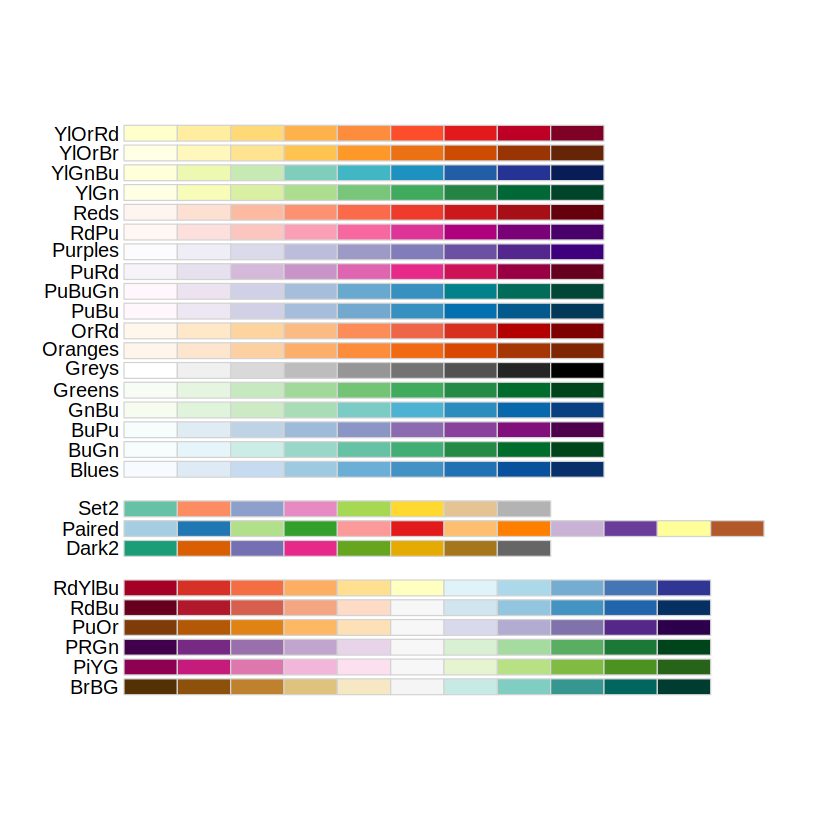

In [12]:
display.brewer.all(colorblindFriendly = TRUE)

In [13]:
# display.brewer.pal(n = 8, name = 'Dark2')
color_map_use = c(RColorBrewer::brewer.pal(8, "Dark2"))

### Common: read data excel

In [14]:
df_original = read_excel("/home/jinhyun/codes/geography_prediction/results/Geography prediction experiments.xlsx", sheet = "results_1M")

In [15]:
names(df_original)

[1] "random_seed"          "select_method"        "select_n"            
 [4] "n_dim_reduced"        "train_model"          "hyper_params"        
 [7] "model_params"         "select_cpu_time"      "select_wall_time"    
[10] "select_memory_usage"  "train_cpu_time"       "train_wall_time"     
[13] "train_memory_usage"   "testset_accuracy"     "testset_f1_micro"    
[16] "testset_f1_macro"     "testset_f1_weighted"  "valset_accuracy"     
[19] "valset_f1_micro"      "valset_f1_macro"      "valset_f1_weighted"  
[22] "trainset_accuracy"    "trainset_f1_micro"    "trainset_f1_macro"   
[25] "trainset_f1_weighted"

In [16]:
df = df_original %>% 
  mutate(plot_unit = interaction(random_seed, select_method, train_model)) 

### Figure 2. Accuracy by n_select and selection method

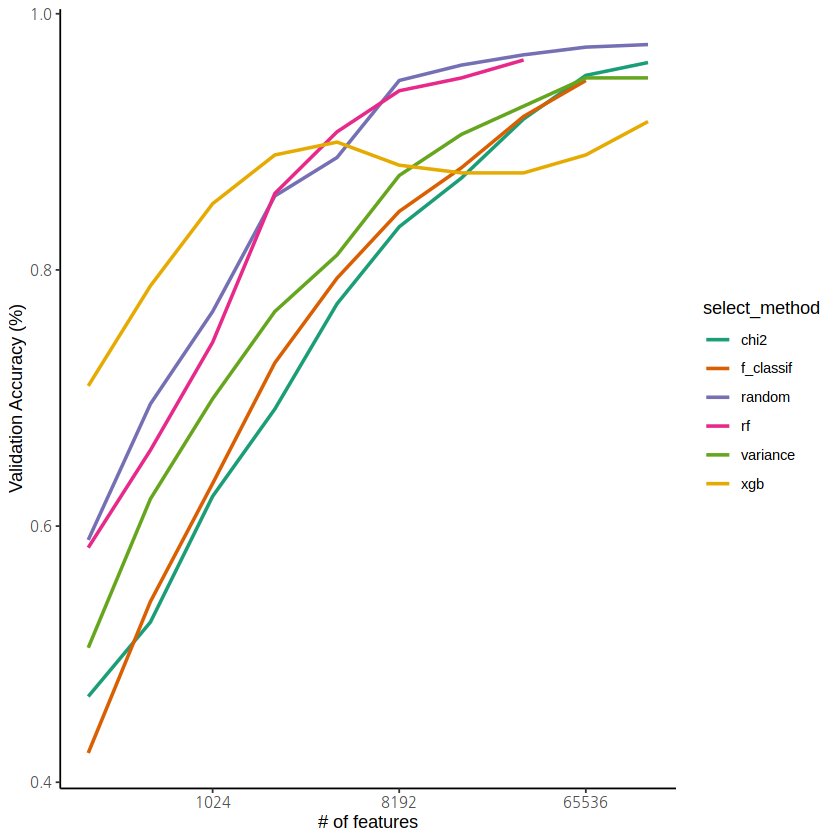

In [19]:
df_for_plot = df %>% 
  filter(train_model == "SVM", 
         # n_dim_reduced == 1024,
         select_n == n_dim_reduced
        )

p = ggplot(data = df_for_plot, aes(x = select_n, y = valset_accuracy, group = plot_unit, colour = select_method)) +
  geom_line(linewidth = 1) +
  xlab("# of features") + 
  ylab("Validation Accuracy (%)") +
  scale_color_brewer(palette = "Dark2") +
  scale_x_continuous(trans='log2') +
  #scale_y_continuous(limits = c(0,1)) +
  theme_bw() + 
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")); 
        print(p)

#ggsave("processing per cost.pdf", width=11.2, height=8, units = c("cm"), dpi = 300)

### Supplementary Fig. Accuracy by train_model

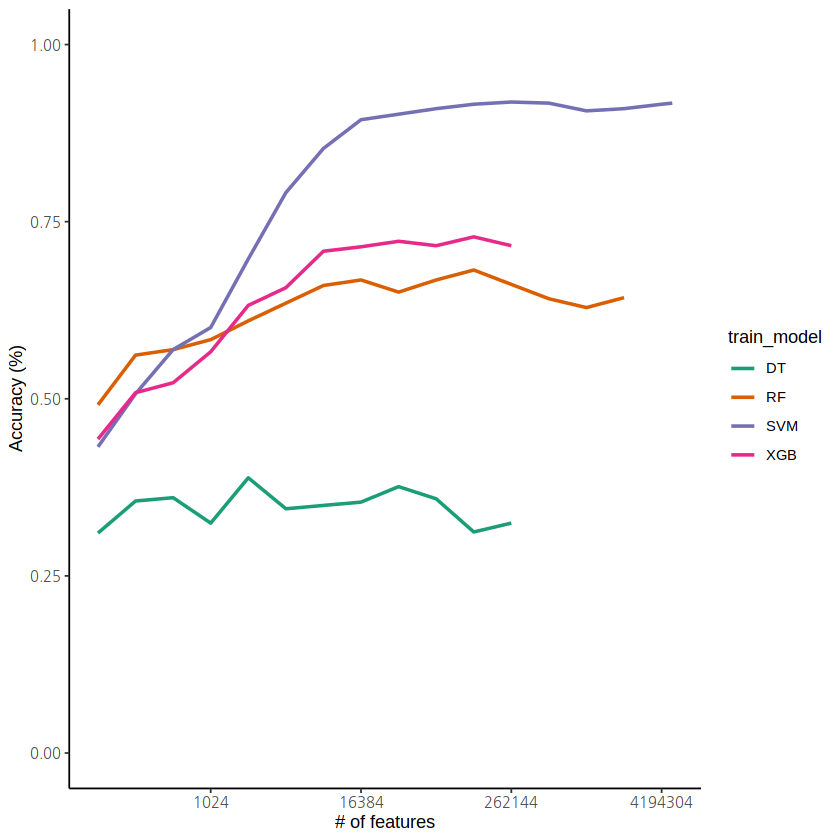

In [32]:
df_for_plot = df %>% filter(select_method == "rf")
p = ggplot(data = df_for_plot, aes(x = select_n, y = accuracy, group = train_model, colour = train_model)) +
  geom_line(linewidth = 1) +
  xlab("# of features") + 
  ylab("Accuracy (%)") +
  scale_color_brewer(palette = "Dark2") +
  scale_x_continuous(trans='log2') +
  scale_y_continuous(limits = c(0,1)) +
  theme_bw() + 
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")); 
        print(p)

### Resources by n_select and method

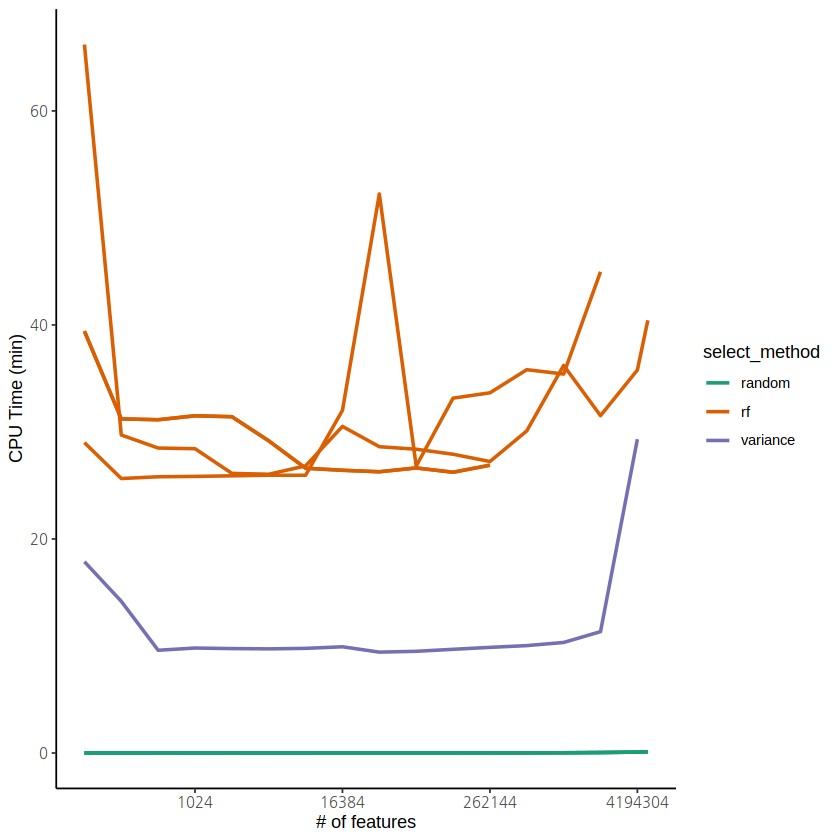

In [34]:
p = ggplot(data = df, aes(x = select_n, y = select_cpu_time, group = plot_unit, colour = select_method)) +
  geom_line(linewidth = 1) +
  xlab("# of features") + 
  ylab("CPU Time (min)") +
  scale_color_brewer(palette = "Dark2") +
  scale_x_continuous(trans='log2') +
  theme_bw() + 
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")); 
        print(p)

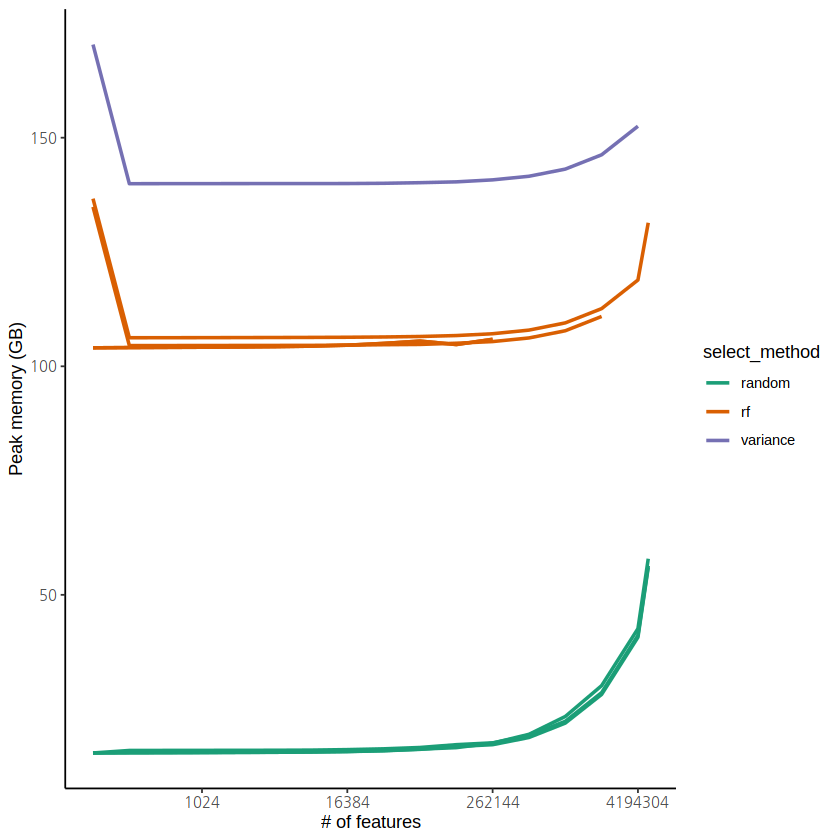

In [36]:
p = ggplot(data = df, aes(x = select_n, y = select_memory_usage, group = plot_unit, colour = select_method)) +
  geom_line(linewidth = 1) +
  xlab("# of features") + 
  ylab("Peak memory (GB)") +
  scale_color_brewer(palette = "Dark2") +
  scale_x_continuous(trans='log2') +
  theme_bw() + 
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")); 
        print(p)